in this notebook, OLS, 2SLS and GMM models in package linearmodels have been implemented on our data, using democratic as instrumental variable to check the effect of altruism on funding per GDP.
notice this is just an attempt (more specifically, to be more familiar with running regressions using python packages), democratic is unlikely to satisfy exogeneity constrain and it's also a weak instrument

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import *
import zipfile
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE
from linearmodels.iv.results import compare
pd.set_option('display.max_columns', 500)

sns.set_theme(style="ticks")

In [2]:
# with zipfile.ZipFile('data.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

In [12]:
long = pd.read_csv('data/result_long.csv')
#discard variable won't be used in regression
long_drop = long.drop(['funding', 'pledge', 'country', 'oda', 'gni'], axis=1)


x = ['posrecip', 'risktaking', 'patience', 'trust', 'negrecip', 'aid', 'gdpcapita','govexpense', 'pop', 'oda_int', 'const', 'income_type', 'region']
long_drop = sm.add_constant(long_drop)
long_replace = long_drop.replace({'funding_gdp': np.nan}, 0)
long_index = long_replace.set_index(['isocode', 'year'])
long_select = long_index[['funding_gdp', 'altruism', 'demo'] + x]
df = long_select.dropna()
df['year'] = pd.Categorical(df.index.to_frame()['year'])

x += ['year']
df.head()

funding_gdp  altruism  demo  posrecip  risktaking  patience  \
isocode year                                                                
AFG     2006       0.0000  0.166455  30.6  0.289641    0.120764  -0.20136   
        2008       0.2374  0.166455  30.2  0.289641    0.120764  -0.20136   
        2010       0.0150  0.166455  24.8  0.289641    0.120764  -0.20136   
        2011       0.0000  0.166455  24.8  0.289641    0.120764  -0.20136   
        2012       0.0000  0.166455  24.8  0.289641    0.120764  -0.20136   

                 trust  negrecip  aid   gdpcapita  govexpense         pop  \
isocode year                                                                
AFG     2006  0.315964  0.254712    0  263.733692      18.303  26433049.0   
        2008  0.315964  0.254712    0  364.660745      20.918  27722276.0   
        2010  0.315964  0.254712    0  543.303042      20.801  29185507.0   
        2011  0.315964  0.254712    0  591.162759      21.937  30117413.0   
        2012  0.315964  0.254712    0  641.871479      25.028  31161376.0   

              oda_int  const income_type      region  year  
isocode year                                                
AFG     2006        0    1.0  Low income  South Asia  2006  
        2008        0    1.0  Low income  South Asia  2008  
        2010        0    1.0  Low income  South Asia  2010  
        2011        0    1.0  Low income  South Asia  2011  
        2012        0    1.0  Low income  South Asia  2012

# heat map to check correlation between variables

<AxesSubplot:>

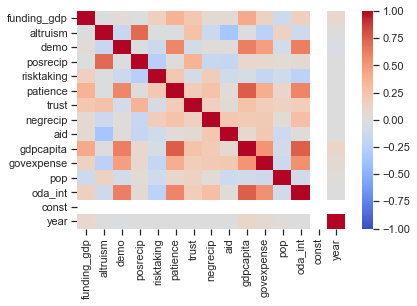

In [13]:

df_scale = long_drop[['funding_gdp', 'altruism', 'demo'] + x]
sns.heatmap(df_scale.corr(), cmap="coolwarm", vmin=-1)

  

# simple ols 
# covariance type set to  heteroskedasticity-autocorrelation robust covariance 

In [14]:

ols = IV2SLS(df['funding_gdp'], df[['altruism', 'demo'] + x], None, None)
res_ols = ols.fit(cov_type='kernel')
res_ols

OLS Estimation Summary                            
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                      0.3773
Estimator:                        OLS   Adj. R-squared:                 0.3544
No. Observations:                 905   F-statistic:                    304.57
Date:                Sun, Dec 20 2020   P-value (F-stat)                0.0000
Time:                        23:23:28   Distribution:                 chi2(32)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
altruism                             -0.0053     0.0058    -0.9191     0.3581     -0.0167      0.0060
demo                                 -0.0005     0.0002    -2.5658     0.0103     -0.0008     -0.0001
posrecip                             -0.0020     0.0053    -0.3785     0.7051     -0.0124      0.0084
risktaking                           -0.0009     0.0077    -0.1113     0.9114     -0.0160      0.0143
patience                              0.0202     0.0147     1.3746     0.1693     -0.0086      0.0491
trust                                 0.0218     0.0080     2.7257     0.0064      0.0061      0.0374
negrecip                             -0.0058     0.0065    -0.8944     0.3711     -0.0186      0.0070
aid                                   0.0027     0.0064     0.4184     0.6756     -0.0099      0.0153
gdpcapita                          9.584e-07  3.474e-07     2.7591     0.0058   2.776e-07   1.639e-06
govexpense                           -0.0001     0.0002    -0.6570     0.5112     -0.0004      0.0002
pop                               -9.856e-12  7.947e-12    -1.2403     0.2149  -2.543e-11   5.719e-12
oda_int                              -0.0075     0.0056    -1.3408     0.1800     -0.0184      0.0035
const                                 0.0227     0.0131     1.7321     0.0833     -0.0030      0.0485
income_type.Low income               -0.0016     0.0092    -0.1788     0.8581     -0.0197      0.0164
income_type.Lower middle income      -0.0056     0.0067    -0.8448     0.3982     -0.0187      0.0074
income_type.Upper middle income      -0.0047     0.0058    -0.8115     0.4171     -0.0162      0.0067
region.Europe & Central Asia          0.0069     0.0063     1.0911     0.2752     -0.0055      0.0192
region.Latin America & Caribbean      0.0119     0.0056     2.1141     0.0345      0.0009      0.0229
region.Middle East & North Africa     0.0101     0.0099     1.0152     0.3100     -0.0094      0.0296
region.North America                 -0.0058     0.0102    -0.5632     0.5733     -0.0259      0.0143
region.South Asia                     0.0212     0.0060     3.5499     0.0004      0.0095      0.0329
region.Sub-Saharan Africa             0.0162     0.0082     1.9696     0.0489   7.955e-05      0.0324
year.2008                             0.0024     0.0037     0.6520     0.5144     -0.0049      0.0098
year.2010                             0.0006     0.0018     0.3134     0.7539     -0.0029      0.0041
year.2011                            -0.0027     0.0021    -1.3097     0.1903     -0.0067      0.0013
year.2012                            -0.0011     0.0024    -0.4618     0.6442     -0.0059      0.0036
year.2013                            -0.0034     0.0022    -1.5277     0.1266     -0.0078      0.0010
year.2014                             0.0010     0.0024     0.4384     0.6611     -0.0036      0.0057
year.2015                             0.0042     0.00

# simple 2sls (z = democratic) 


In [15]:

iv = IV2SLS(df['funding_gdp'], df[x], df['altruism'], df['demo'])
res_iv = iv.fit(cov_type='kernel')
res_iv

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3569
Estimator:                    IV-2SLS   Adj. R-squared:                -5.5826
No. Observations:                 905   F-statistic:                    18.444
Date:                Sun, Dec 20 2020   P-value (F-stat)                0.9636
Time:                        23:23:28   Distribution:                 chi2(31)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2722     0.4149     0.6560     0.5118     -0.5410      1.0854
risktaking                            0.0271     0.0620     0.4373     0.6619     -0.0944      0.1487
patience                             -0.0147     0.0718    -0.2050     0.8376     -0.1554      0.1259
trust                                 0.0363     0.0401     0.9058     0.3650     -0.0423      0.1149
negrecip                              0.0263     0.0486     0.5415     0.5881     -0.0689      0.1216
aid                                  -0.0345     0.0846    -0.4074     0.6837     -0.2003      0.1314
gdpcapita                           2.97e-06  3.194e-06     0.9300     0.3524   -3.29e-06    9.23e-06
govexpense                           -0.0027     0.0037    -0.7373     0.4610     -0.0099      0.0045
pop                                3.026e-11  6.787e-11     0.4458     0.6557  -1.028e-10   1.633e-10
oda_int                              -0.0155     0.0473    -0.3286     0.7424     -0.1082      0.0771
const                                 0.0047     0.0451     0.1054     0.9161     -0.0836      0.0931
income_type.Low income                0.0232     0.0454     0.5116     0.6089     -0.0658      0.1123
income_type.Lower middle income       0.0619     0.0976     0.6339     0.5261     -0.1295      0.2532
income_type.Upper middle income       0.0290     0.0469     0.6193     0.5357     -0.0628      0.1209
region.Europe & Central Asia         -0.0010     0.0301    -0.0346     0.9724     -0.0601      0.0580
region.Latin America & Caribbean      0.0220     0.0335     0.6564     0.5116     -0.0437      0.0878
region.Middle East & North Africa     0.0621     0.0711     0.8740     0.3821     -0.0772      0.2014
region.North America                  0.0586     0.1111     0.5271     0.5981     -0.1592      0.2763
region.South Asia                     0.0586     0.0934     0.6275     0.5303     -0.1244      0.2417
region.Sub-Saharan Africa             0.0421     0.0539     0.7805     0.4351     -0.0636      0.1478
year.2008                             0.0002     0.0075     0.0230     0.9816     -0.0144      0.0148
year.2010                             0.0037     0.0065     0.5619     0.5742     -0.0091      0.0165
year.2011                            -0.0039     0.0082    -0.4724     0.6367     -0.0200      0.0122
year.2012                            -0.0007     0.0080    -0.0934     0.9256     -0.0164      0.0149
year.2013                            -0.0041     0.0089    -0.4619     0.6442     -0.0214      0.0133
year.2014                             0.0009     0.0092     0.0939     0.9252     -0.0172      0.0190
year.2015                             0.0064     0.0086     0.7376     0.4607     -0.0105      0.0233
year.2016                             0.0039     0.0085     0.4600     0.6455     -0.0128      0.0207
year.2017                            -0.0022     0.

# simple GMM model 

In [16]:
gmm = IVGMM(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_gmm = gmm.fit(cov_type='kernel')
res_gmm


IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3569
Estimator:                     IV-GMM   Adj. R-squared:                -5.5826
No. Observations:                 905   F-statistic:                    560.44
Date:                Sun, Dec 20 2020   P-value (F-stat)                0.0000
Time:                        23:23:29   Distribution:                 chi2(31)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2722     0.1506     1.8074     0.0707     -0.0230      0.5673
risktaking                            0.0271     0.0381     0.7122     0.4764     -0.0475      0.1017
patience                             -0.0147     0.0344    -0.4283     0.6684     -0.0820      0.0526
trust                                 0.0363     0.0211     1.7188     0.0856     -0.0051      0.0777
negrecip                              0.0263     0.0240     1.0981     0.2721     -0.0207      0.0733
aid                                  -0.0345     0.0352    -0.9786     0.3278     -0.1035      0.0346
gdpcapita                           2.97e-06  1.281e-06     2.3191     0.0204   4.599e-07    5.48e-06
govexpense                           -0.0027     0.0014    -1.9877     0.0468     -0.0054  -3.788e-05
pop                                3.026e-11  2.732e-11     1.1074     0.2681  -2.329e-11   8.381e-11
oda_int                              -0.0155     0.0279    -0.5568     0.5777     -0.0702      0.0392
const                                 0.0047     0.0224     0.2115     0.8325     -0.0393      0.0487
income_type.Low income                0.0232     0.0302     0.7689     0.4419     -0.0360      0.0825
income_type.Lower middle income       0.0619     0.0337     1.8379     0.0661     -0.0041      0.1279
income_type.Upper middle income       0.0290     0.0145     1.9974     0.0458      0.0005      0.0575
region.Europe & Central Asia         -0.0010     0.0072    -0.1442     0.8853     -0.0152      0.0131
region.Latin America & Caribbean      0.0220     0.0160     1.3752     0.1691     -0.0094      0.0534
region.Middle East & North Africa     0.0621     0.0280     2.2196     0.0264      0.0073      0.1170
region.North America                  0.0586     0.0423     1.3840     0.1664     -0.0244      0.1415
region.South Asia                     0.0586     0.0453     1.2925     0.1962     -0.0303      0.1475
region.Sub-Saharan Africa             0.0421     0.0292     1.4396     0.1500     -0.0152      0.0994
year.2008                             0.0002     0.0043     0.0399     0.9681     -0.0083      0.0086
year.2010                             0.0037     0.0027     1.3785     0.1681     -0.0015      0.0089
year.2011                            -0.0039     0.0029    -1.3393     0.1805     -0.0096      0.0018
year.2012                            -0.0007     0.0018    -0.4098     0.6819     -0.0043      0.0028
year.2013                            -0.0041     0.0028    -1.4689     0.1419     -0.0095      0.0014
year.2014                             0.0009     0.0031     0.2816     0.7782     -0.0052      0.0069
year.2015                             0.0064     0.0042     1.5162     0.1295     -0.0019      0.0146
year.2016                             0.0039     0.0048     0.8113     0.4172     -0.0056      0.0134
year.2017                            -0.0022     0.

# Continuously updating GMM model  

In [17]:
iv_gmm_cue = IVGMMCUE(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_cue = iv_gmm_cue.fit(cov_type='robust', display=True)
res_cue

         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1398
         Gradient evaluations: 42


IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3569
Estimator:                     IV-GMM   Adj. R-squared:                -5.5826
No. Observations:                 905   F-statistic:                    97.210
Date:                Sun, Dec 20 2020   P-value (F-stat)                0.0000
Time:                        23:23:30   Distribution:                 chi2(31)
Cov. Estimator:                robust                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2722     0.1359     2.0029     0.0452      0.0058      0.5385
risktaking                            0.0271     0.0210     1.2902     0.1970     -0.0141      0.0683
patience                             -0.0147     0.0250    -0.5892     0.5557     -0.0637      0.0342
trust                                 0.0363     0.0150     2.4277     0.0152      0.0070      0.0656
negrecip                              0.0263     0.0164     1.6056     0.1084     -0.0058      0.0585
aid                                  -0.0345     0.0257    -1.3414     0.1798     -0.0849      0.0159
gdpcapita                           2.97e-06  1.129e-06     2.6308     0.0085   7.574e-07   5.183e-06
govexpense                           -0.0027     0.0012    -2.2257     0.0260     -0.0051     -0.0003
pop                                3.026e-11  2.198e-11     1.3767     0.1686  -1.282e-11   7.334e-11
oda_int                              -0.0155     0.0152    -1.0213     0.3071     -0.0454      0.0143
const                                 0.0047     0.0192     0.2474     0.8046     -0.0329      0.0424
income_type.Low income                0.0232     0.0155     1.4956     0.1347     -0.0072      0.0537
income_type.Lower middle income       0.0619     0.0324     1.9128     0.0558     -0.0015      0.1253
income_type.Upper middle income       0.0290     0.0170     1.7086     0.0875     -0.0043      0.0623
region.Europe & Central Asia         -0.0010     0.0112    -0.0931     0.9258     -0.0230      0.0209
region.Latin America & Caribbean      0.0220     0.0122     1.8086     0.0705     -0.0018      0.0459
region.Middle East & North Africa     0.0621     0.0240     2.5867     0.0097      0.0151      0.1092
region.North America                  0.0586     0.0361     1.6219     0.1048     -0.0122      0.1293
region.South Asia                     0.0586     0.0326     1.7952     0.0726     -0.0054      0.1226
region.Sub-Saharan Africa             0.0421     0.0189     2.2253     0.0261      0.0050      0.0791
year.2008                             0.0002     0.0126     0.0136     0.9892     -0.0246      0.0250
year.2010                             0.0037     0.0122     0.3004     0.7639     -0.0203      0.0276
year.2011                            -0.0039     0.0125    -0.3110     0.7558     -0.0283      0.0206
year.2012                            -0.0007     0.0124    -0.0602     0.9520     -0.0250      0.0235
year.2013                            -0.0041     0.0124    -0.3287     0.7424     -0.0285      0.0203
year.2014                             0.0009     0.0125     0.0697     0.9444     -0.0235      0.0253
year.2015                             0.0064     0.0124     0.5130     0.6080     -0.0180      0.0307
year.2016                             0.0039     0.0125     0.3142     0.7533     -0.0206      0.0284
year.2017                            -0.0022     0.

# using LIML model, perform better at weakly identified

In [18]:
iv_liml = IVLIML(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_liml = iv_liml.fit(cov_type='robust')
res_liml

IV-LIML Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3569
Estimator:                    IV-LIML   Adj. R-squared:                -5.5826
No. Observations:                 905   F-statistic:                    97.210
Date:                Sun, Dec 20 2020   P-value (F-stat)                0.0000
Time:                        23:23:30   Distribution:                 chi2(31)
Cov. Estimator:                robust                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2722     0.1359     2.0029     0.0452      0.0058      0.5385
risktaking                            0.0271     0.0210     1.2902     0.1970     -0.0141      0.0683
patience                             -0.0147     0.0250    -0.5892     0.5557     -0.0637      0.0342
trust                                 0.0363     0.0150     2.4277     0.0152      0.0070      0.0656
negrecip                              0.0263     0.0164     1.6056     0.1084     -0.0058      0.0585
aid                                  -0.0345     0.0257    -1.3414     0.1798     -0.0849      0.0159
gdpcapita                           2.97e-06  1.129e-06     2.6308     0.0085   7.574e-07   5.183e-06
govexpense                           -0.0027     0.0012    -2.2257     0.0260     -0.0051     -0.0003
pop                                3.026e-11  2.198e-11     1.3767     0.1686  -1.282e-11   7.334e-11
oda_int                              -0.0155     0.0152    -1.0213     0.3071     -0.0454      0.0143
const                                 0.0047     0.0192     0.2474     0.8046     -0.0329      0.0424
income_type.Low income                0.0232     0.0155     1.4956     0.1347     -0.0072      0.0537
income_type.Lower middle income       0.0619     0.0324     1.9128     0.0558     -0.0015      0.1253
income_type.Upper middle income       0.0290     0.0170     1.7086     0.0875     -0.0043      0.0623
region.Europe & Central Asia         -0.0010     0.0112    -0.0931     0.9258     -0.0230      0.0209
region.Latin America & Caribbean      0.0220     0.0122     1.8086     0.0705     -0.0018      0.0459
region.Middle East & North Africa     0.0621     0.0240     2.5867     0.0097      0.0151      0.1092
region.North America                  0.0586     0.0361     1.6219     0.1048     -0.0122      0.1293
region.South Asia                     0.0586     0.0326     1.7952     0.0726     -0.0054      0.1226
region.Sub-Saharan Africa             0.0421     0.0189     2.2253     0.0261      0.0050      0.0791
year.2008                             0.0002     0.0126     0.0136     0.9892     -0.0246      0.0250
year.2010                             0.0037     0.0122     0.3004     0.7639     -0.0203      0.0276
year.2011                            -0.0039     0.0125    -0.3110     0.7558     -0.0283      0.0206
year.2012                            -0.0007     0.0124    -0.0602     0.9520     -0.0250      0.0235
year.2013                            -0.0041     0.0124    -0.3287     0.7424     -0.0285      0.0203
year.2014                             0.0009     0.0125     0.0697     0.9444     -0.0235      0.0253
year.2015                             0.0064     0.0124     0.5130     0.6080     -0.0180      0.0307
year.2016                             0.0039     0.0125     0.3142     0.7533     -0.0206      0.0284
year.2017                            -0.0022     0.

# comparing of the results

In [19]:
res = dict()
res['OLS'] = res_ols
res['2SLS-Hetero'] = res_iv
res['GMM'] = res_gmm
res['GMM-CUE'] = res_cue
res['LIML'] = res_liml

compare(res)

,OLS,2SLS-Hetero,GMM,GMM-CUE,LIML
Dep. Variable,funding_gdp,funding_gdp,funding_gdp,funding_gdp,funding_gdp
Estimator,OLS,IV-2SLS,IV-GMM,IV-GMM,IV-LIML
No. Observations,905,905,905,905,905
Cov. Est.,kernel,kernel,kernel,robust,robust
R-squared,0.3773,-5.3569,-5.3569,-5.3569,-5.3569
Adj. R-squared,0.3544,-5.5826,-5.5826,-5.5826,-5.5826
F-statistic,304.57,18.444,560.44,97.210,97.210
P-value (F-stat),0.0000,0.9636,0.0000,9.378e-09,9.378e-09
===================================,=============,=============,=============,=============,=============
altruism,-0.0053,-0.3909,-0.3909,-0.3909,-0.3909


In [20]:
res.pop('OLS')
for key in res:
    print(res[key].first_stage)


         First Stage Estimation Results        
                                       altruism
-----------------------------------------------
R-squared                                0.6826
Partial R-squared                        0.0041
Shea's R-squared                         0.0041
Partial F-statistic                      0.4603
P-value (Partial F-stat)                 0.4975
Partial F-stat Distn                    chi2(1)
=================================== ===========
posrecip                                 0.7111
                                       (11.568)
risktaking                               0.0726
                                       (0.6134)
patience                                -0.0907
                                      (-0.7096)
trust                                    0.0377
                                       (0.4707)
negrecip                                 0.0834
                                       (1.0516)
aid                                     